In [1]:
import seaborn as sns

In [2]:
anscombe = sns.load_dataset("anscombe")

In [4]:
anscombe.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


## Mathplotloib

In [6]:
import matplotlib.pyplot as plt

In [27]:
d_set1 = anscombe[anscombe['dataset'] == 'I']
d_set2 = anscombe[anscombe['dataset'] == 'II']
d_set3 = anscombe[anscombe['dataset'] == 'III']
d_set4 = anscombe[anscombe['dataset'] == 'IV']

## Plots

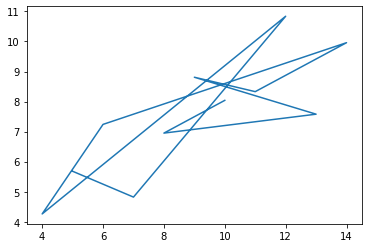

In [28]:
plt.plot(d_set1['x'], d_set1['y'])

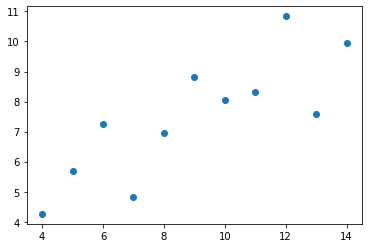

In [29]:
plt.plot(d_set1['x'], d_set1['y'], 'o')

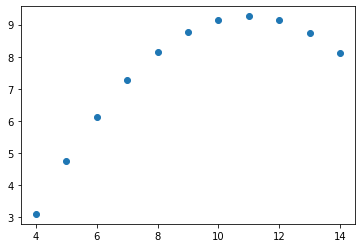

In [30]:
plt.plot(d_set2['x'], d_set2['y'], 'o')

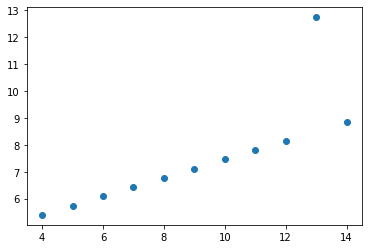

In [31]:
plt.plot(d_set3['x'], d_set3['y'], 'o')

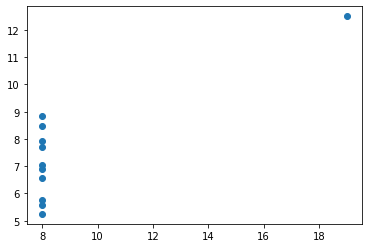

In [32]:
plt.plot(d_set4['x'], d_set4['y'], 'o')

## Subplotting

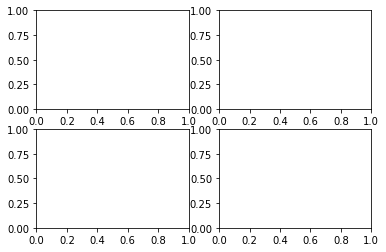

In [38]:
fig = plt.figure()

# 2 rows , 2 cols, plot loc 1
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

In [46]:
axes1.plot(d_set1['x'], d_set1['y'], 'o')
axes2.plot(d_set2['x'], d_set2['y'], 'o')
axes3.plot(d_set3['x'], d_set3['y'], 'o')
axes4.plot(d_set4['x'], d_set4['y'], 'o')

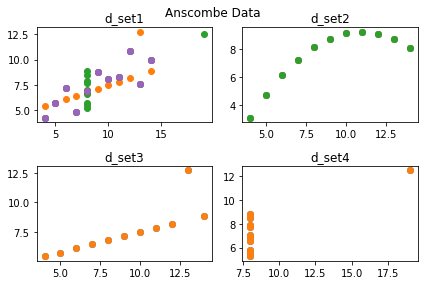

In [47]:
axes1.set_title("d_set1")
axes2.set_title("d_set2")
axes3.set_title("d_set3")
axes4.set_title("d_set4")

fig.suptitle("Anscombe Data")

fig.tight_layout()
fig

## Statistical Graphics using Matplotlib

In [49]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Univariate

#### histogram

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


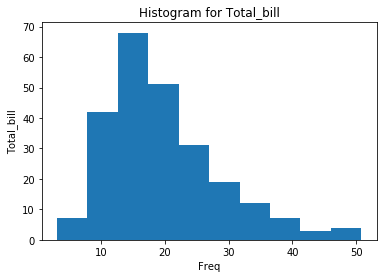

In [53]:
uni_fig = plt.figure()

axes1 = uni_fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins=10)

axes1.set_title('Histogram for Total_bill')
axes1.set_xlabel('Freq')
axes1.set_ylabel('Total_bill')
uni_fig.show()

### Bivariate

#### Scatter plot

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


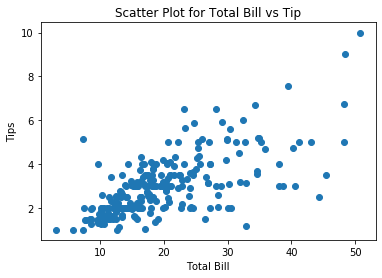

In [56]:
scatter_plt = plt.figure()

axes2 = scatter_plt.add_subplot(1,1,1)
axes2.scatter(tips['total_bill'], tips['tip'])

axes2.set_title('Scatter Plot for Total Bill vs Tip')
axes2.set_xlabel('Total Bill')
axes2.set_ylabel('Tips')

scatter_plt.show()

#### Box plot

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


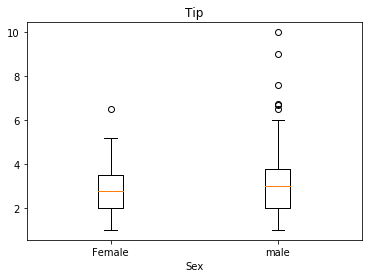

In [57]:
box_plot = plt.figure()

axes3 = box_plot.add_subplot(1,1,1)

axes3.boxplot([tips[tips['sex'] == 'Female']['tip'], tips[tips['sex']=='Male']['tip']], labels=['Female','male'])

axes3.set_title("Box plot of Tips vs Sex")
axes3.set_xlabel('Sex')
axes3.set_title('Tip')

box_plot.show()

### Multivariate Data

AttributeError: 'AxesSubplot' object has no attribute 'set_ylable'

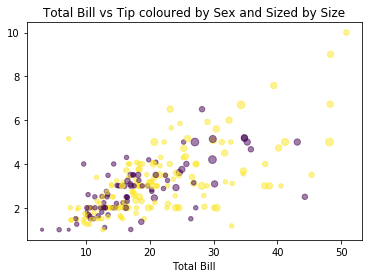

In [58]:
def rename_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1

tips['sex_color'] = tips['sex'].apply(rename_sex)

scatter_plt = plt.figure()

axes4 = scatter_plt.add_subplot(1,1,1)
axes4.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10,
    c=tips['sex_color'],
    alpha=0.5
)

axes4.set_title("Total Bill vs Tip coloured by Sex and Sized by Size")

axes4.set_xlabel('Total Bill')
axes4.set_ylable('Tip')

axes4.show()